# Clustering and Mixture Models



## Clustering and Mixture Models

04/06/20

Andreas C. Müller



Today we're gonna talk about clustering and mixture models,
mostly clustering algorithms.

FIXME: 'real world' examples? Usecases, better motivation?
FIXME: illustration of Kmeans++
FIXME: linkage explanation diagram
FIXME: cluster sized in particularly good for dbscan (what did I mean?)
debugging (what did I mean?!)


## Clustering

.center[
![:scale 70%](images/cluster_intro_1.png)
]



The ideas is that you start out with a bunch of data points,
and the assumption is that they fall into groups or
clusters, and the goal is to discover these underlying
groups.

.center[
![:scale 70%](images/cluster_intro_2.png)
]



For example you want to find that these points belong to the
same groups, and these, and these.

.center[
![:scale 70%](images/cluster_intro_3.png)
]


Usually the clusters are identified by a cluster label or cluster indicator,
though these numbers are arbitrary. What you care about is which points belong to the same cluster.
So I could relabel the clusters and this would still be considered the same clustering.


What we're really interested in is the partitioning of the
data, though the way it's implemented in the scikit-learn
API is that you predict an integer for each data point, so
the clusters are numbered 0.. n_clusters -1. So we'd label
these points with 0, these with one, and so on. But you
should keep in mind that the number themselves have no
meaning, renumbering the clusters corresponds to the same
clustering.  We're really only interested in which points
have the same labels and which points have different labels.

## Clustering

- Partition data into groups (clusters)
- Points within a cluster should be “similar”.
- Points in different cluster should be “different”.





So you want to partition the data, so that each data point
belongs to exactly one of the groups. And you want to define
groups such that points in the same cluster are similar, and
points in different clusters are different. And the
different algorithms define how they measure similarity in
different ways.


- Number of clusters might be pre-specified. - Notations of
“similar” and “different” depend on algorithm or user specified metrics.
- Identify groups by assigning “cluster labels” to each data point. FIXME!

.center[
![:scale 70%](images/cluster_intro_3.png)
]



The cluster algorithms have many parameters, and one of the
most common ones is the number of clusters. In this dataset
I drew here, it's quite obvious that there are three groups,
and if it's this obvious there is usually a way to figure
out how many groups there are. But for many algorithms, you
need to specify the number of groups in advance.

.center[
![:scale 70%](images/cluster_intro_4.png)
]



Group into 4 clusters


If you misspecify the number of groups you'd get something
like this. To pick the number of clusters, in general you either need to have
some prior knowledge about the data, or you need to inspect
the results manually to see if the parameters are good.

Often, you don't know the number of clusters, or if there
are even clusters in the data. Very rarely is the case as
clear as in this example.  Still there might be a reasonable
grouping, so there is no "right" amount of clusters, but you
might still get something out of the clustering.

## Goals of Clustering

- Data Exploration
  - Are there coherent groups ?
  - How many groups are there ?


So why would we want to use a clustering algorithm? The
main usage that I've come across is exporation of the data
and understanding the structure of the data. Are there
similar groups within the data? What are these? How many are
there?  You can also use clustering to summarize or compress
the data by representing each group by a single prototype,
say the center. You can also use clustering if you want to
divide your data, for example if you want to know different
parts of the dataset behave fundamentally differently, so
you could for example cluster a dataset, and then apply,
say, a linear model, to each cluster. That would create a
more powerfull model than just learning a linear model on
the whole dataset.

--

- Data Partitioning
  - Divide data by group before further processing

--

- Unsupervised feature extraction
  - Derive features from clusters or cluster distances



Another use is unsupervised feature extraction. You can also
use clustering to derive a different representation of the
data.

An often cited application of clustering is customer
segmentation, though I'd say data exploration or feature
extraction are more common.


--

- Evaluation and parameter tuning
  - Quantitative measures of limited use
  - Usually qualitative measures used
  - Best: downstream tasks
  - What is your goal?


## Clustering Algorithms



So now let's start discussing some of the standard
algorithms.


## K-Means



One of the most basic and most well-known ones is kmeans.
Here k stands for the number of clusters you're trying to
find.

## Objective function for K-Means




$$\Large \min_{\mathbf{c}_j \in \mathbf{R}^p, j=1,..,k} \sum_i ||\mathbf{x}_i - \mathbf{c}_{x_i}||^2 $$
$\mathbf{c}_{x_i}$ is the cluster center $c_j$ closest to $x_i$


- Finds a local minimum of minimizing squared distances (exact solution is
NP hard):
- New data points can be assigned cluster membership based on existing clusters.

Here is what this algorithm optimizes, the
objective function.

It's the sum of the distances of the cluster centers to all
the points in the clusters.

So the clusters centers are c_j and we want to find cluster
centers such that the sum of the distance of each point to
its closest cluster center is minimized.

This is an NP hard problem, so we can't really hope to solve
it exactly, but we can run the k-means algorithm that we'll discussed,
and it will provide us with some local minimum of this objective.

## K-Means algorithm (Lloyd's)
.wide-left-column[
.center[
![:scale 100%](images/kmeans.png)
]
]

.narrow-right-column[
.smaller[
- Pick number of clusters k.
- Pick k random points as
“cluster center”
- While cluster centers change:
  1. Assign each data point to it’s closest cluster center
  2. Recompute cluster centers as the mean of the assigned points.
]
]



The algorithm proceeds like this: you pick the number of
clusters k, then you randomly pick k data points from the
data, and declare those as cluster centers. Then, you label
each data point according to which cluster center it is
closest to. Finally, you recompute the cluster centers as
the means of the clusters, and you iterate. The algorithm
always converges, which is when the assignment of the points
to the clusters doesn't change any more. Often you might
want to not wait until full convergence, but just stop if
the cluster centers don't move much between iterations.

So you can see the green cluster center moving towards the
red here until it has captured all the points in this group.
Questions? Who has seen this before?

There's a couple of nice things about this algorithm;

It's very easy to write down and understand. Each cluster is
represented by a center, which makes things simple, and you
can reassign any new point you observe to a cluster by just
computing the distances to all the cluster centers.

So in this case, if we build a model on some data that we
collected, we can easily apply this clustering to new data
points. That's not the case for all clustering algorithms.

## K-Means API


.narrow-right-column[
.center[
![:scale 100%](images/kmeans_api.png)
]
]

.wide-left-column[
.smaller[
```python
X, y = make_blobs(centers=4, random_state=1)

km = KMeans(n_clusters=5, random_state=0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
```
```
(5, 2)
(100,)
```
```python
## predict is the same as labels_ on training data
## but can be applied to new data
print(km.predict(X).shape)
```
```
(100,)
```
```python
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
```

]
]



In scikit-learn, I’ve made some random data points. I
instantiated a KMeans object, passing the number of clusters
I want and for reproducibility I set the random state to 0,
I implemented fit, and then I inspected some of attributes.
So the shape of cluster centers is 5 and 2. Meaning there’s
5 cluster centers in 2-dimensions. The labels are the
cluster indices assigned to the data. So there's 100 data
points and each of them is assigned an integer from zero to
four.

KMeans also has a predict method. The predict method
computes the cluster labels according to this clustering. So
this is a nice property of KMeans that you can assign
cluster labels to new data points, via this predict methods.

If you call predict method on the training dataset, you get
the same thing back that is in labels, which is just a
training data labels. But you can also pass in any new data
that you observe, and it will assign one of the clusters
based on which cluster centers are closest.

Q: Why is the centers in two dimensions?

Because the input spaces is in two dimensions in this toy
dataset.

Cluster centers live in the same space as the data.

## Restriction of Cluster Shapes
.left-column[
![:scale 85%](images/cluster_shapes_1.png)
]
.right-column[
![:scale 100%](images/cluster_shapes_2.png)
]
.reset-column[
Clusters are Voronoi-diagrams of centers
]



I want to talk about some of the properties and limitations
of KMeans.

So the cluster shapes, I restricted them in KMeans because
they're Voronoi-diagram of the centers.

Voronoi-diagrams basically just mean these cells… while the
boundary between two neighboring clusters is just the center
of the two centers. So given these centers completely define
a clustering and so you compute this distance boundaries.
The whole clustering is specified just by the cluster
centers, but that really restricts the shape. So all of
these cells will be convex sets, so you can't have like a
banana shape or something like that. That's one of the
limitations.

- Clusters are always convex in space

## Limitations of K-Means

.center[
![:scale 60%](images/kmeans_limitations_1.png)
]

- Cluster boundaries equidistant to centers



You can also not really model the size of centers very well.
So here, I have three clusters and this is the result of
KMeans on this dataset that I created from three Gaussians.
So the Gaussians I used to create this data set was one big
blob in the center and one smaller ones in bottom left
corner and top right corner.

But KMeans wasn't really able to pick up on these three
clusters because the boundary between the clusters is the
middle between the cluster centers.

## Limitations of K-Means

.center[
![:scale 60%](images/kmeans_limitations_2.png)
]

 - Can’t model covariances well



It's also not able to capture covariance. So here, for
example, there's three groups in this dataset, and KMeans
doesn't really pick up on these shapes.

## Limitations of K-Means

.center[
![:scale 60%](images/kmeans_limitations_3.png)
]

- Only simple cluster shapes



Since you have only simple cluster shapes, so if I use this
two cluster dataset, this will be what KMeans gives me
because basically it cannot do anything else but straight
lines for two clusters.

Even though it has these restrictions it’s still a very
commonly used algorithm. And so we'll talk a little bit more
about some of the other properties of this algorithm.


## Computational Properties

- Naive implementation (Lloyd's):
  - n_cluster * n_samples distance calculations per iteration


The naïve implementation is what I basically talked about,
in each iteration it requires you to compute the distance
from all data points to all the cluster centers. So you have
to do number of clusters times number of samples, many
distance calculation per iteration.
That's actually if you have many clusters or if you have
many features or if you have many samples that can take like
a whole bunch of time.

--

- Fast "exact" algorithms:
  - Elkan's, Ying-Yang, ...



There's also fast exact algorithms. One of them is
implemented in scikit-learn called Elkan’s. Another
algorithm is Ying-Yang, which is maybe five years old. There
are newer algorithms being developed that uses the triangle
inequality to not re-compute all the distances. So
basically, in these algorithms you compute the distances
between the clusters and if one cluster is far enough from
another cluster, the data point that was assigned to the
first cluster will not be assigned to the second cluster
since the distance between clusters is so big. And so you
can use the triangle inequality to save lot of these
distance calculations.

--

- Approximate algorithms:
  - minibatch K-Means





And finally, there's a bunch of approximate algorithms,
particularly, minibatch KMeans. It’s much much faster than
KMeans, but it's an approximation.

So here's, saying exact algorithm means exact in the sense,
that they are exactly the same as what Lloyd wrote down in
the 50s, but not exact as they don’t actually solve the
problem. Solving the optimization problem exactly is
impossible. So it's not really clear if it's very important
how exactly this is as you always just have an approximation
so it might be a good idea to give up on trying to do
exactly the thing that Lloyd did and something like
minibatch KMeans, which can be much, much faster.

Q: Do we do feature engineering?

Yes, since this is distance space, scaling is clearly
important. But the problem is, you can't really evaluate
well how good your clustering is. And so it's not very easy
to prototype anything at all. So you can try to engineer
features around the clustering again, but then you need to
compare the old and the new clustering. And basically, you
need to look into the data and see does the new clustering
make more sense than the old one.

## Initialization

- Random centers fast.
- K-means++ (default):
Greedily add “furthest way” point
- By default K-means in sklearn does 10 random
restarts with different initializations.
- K-means++ initialization may take much longer than clustering.



What I said before is basically compute random centers,
that's very fast. But it's also not very great, there's a
strategy that's the default in scikit-learn that is very
commonly used is called K-means++.

It picks a point randomly, and then adds the most furthest
away point in the data to it. And then it adds the most
further away point to both of these two points, and so on.
So it always pick the further away point.

I think there’s some randomization there. But the idea is
for the initial cluster center to be far away as possible
and that might give you better optima, and it might speed up
the optimization.

The problem with this is that if you do this, like greedily
adding the furthest away point, you need to compute a lot of
distances. And if you have many clusters and many data
points it becomes very expensive.

And in particular, if you're using Minibatch KMeans, I've
seen that running this initialization scheme becomes
actually much more expensive than running clustering. And
that's kind of silly. So if you run KMeans on bigger data
sets you should be aware of how much time does the
initialization take and  how much time does your clustering
take and maybe do a super initialization if it takes too
long.

One thing you should be aware of is that by default,
scikit-learn does 10 years random restarts for KMeans. So
basically, it does this KMeans++ strategy 10 times, runs the
full algorithm until convergence and then retains the
results that is the best according to the criteria.

So if you have a big data set, you might not want to do
that. And you might just set init to one and just run it
once.



FIXME slide for kmeans++, computational cost of kmeans++
- Consider using random, in particular for MiniBatchKMeans

## Feature Extraction using K-Means

- Cluster membership → categorical feature
- Cluster distanced → continuous feature
- Examples:
  - Partitioning low-dimensional space (similar to using basis functions)
  - Extracting features from high-dimensional spaces, for image patches, see
  http://ai.stanford.edu/~acoates/papers/coatesleeng_aistats_2011.pdf



I think one of the most useful ways to use KMeans is to
extract new nonlinear features. You can either add
categorical features saying it belongs to this cluster or
you can add continuous features saying the distance to this
cluster is that. So if you call the transform method in
scikit-learn, it will compute the distances to all the
cluster centers. So you'll have a new feature space that has
number of clusters many dimensions, and that's a very
nonlinear transformation of original feature space. This can
be helpful, sometimes. In particularly if you have very
simple models.

In this paper on the C4 dataset, they ran KMeans, used the
cluster centers to extract features and then ran logistic
regression and it was as good as the deep learning methods
at that time.

By now, deep learning is much, much better than this. But it
was very interesting because it uses very simple approach to
find basically prototypes in the data center, they used like
hundreds or thousands of cluster centers and then use the
distances to these cluster centers as the features.


## Agglomerative Clustering



The next algorithm I want to talk about is similarly
classical, it’s called agglomerative clustering.

## Agglomerative Clustering

- Start with all points in their own cluster.
- Greedily merge the two most similar clusters.

.center[
![:scale 80%](images/agglomerative_clustering.png)
]



In agglomerative clustering, the idea is that you start out
with a bunch of points again. You assign each point its own
cluster label, and then you greedily merge clusters that are
similar. So here, each of the points is its own cluster,
then, in step one, I'm merge the two closest points. Step
two, I merged the next closest one, and so on. I can keep
merging and merging until one big group is left. Here, I
merged until there's three clusters left.



- Creates a hierarchical clustering from with cluster
sizes from n_samples to single cluster.


## Dendograms

.left-column[
![:scale 100%](images/dendograms_1.png)
]

.left-column[
![:scale 80%](images/dendograms_2.png)
]



Dendogram is another visualization of agglomerative
clustering. Here, given this procedure, you can visualize
this as a tree. It is also called as hierarchical
clustering, because it gives you a whole hierarchy of
different clusters. On the lowest level of the hierarchy,
each data point is its own cluster center.

So here, I have 12 data points so I would have 12 clusters.
And if I merged everything, I have one cluster. But in
between, there's this whole hierarchy of different numbers
of clusters. Here, you can see the one and four was merged
first, then six and nine was merged, then two and eight was
merged, then zero and eleven, then five and zero and eleven
and so on.

The length of these bars are basically the distance between
the clusters that got merged. So you can see the distance
between zero and eleven, and zero, eleven, and five are very
small. So that basically means that all three of them have
almost the same distance. Whereas here, you can see one and
four are much closer together than one and four and three
and two.

By looking at this dendogram, it’s very helpful for picking
the number of clusters. So if I look at this, I would
probably say, three is the right number of clusters.

So for agglomerative clustering, you can either pick the
number of clusters or you can basically pick a threshold on
the merging criteria. So basically, if the clusters are too
far away, you stop merging. But you need to specify one of
these two things, either number of clusters, or when should
you stop merging. But for both, looking at Dendogram is
quite useful.

Agglomerative clustering is in scikit learn while Dendogram
are not available. But Dendogram can be computed in scipy
(code available in the GitHub repository)

Dendograms are mostly helpful if you don't have many data
points. If you have millions of data points, then this tree
will not be very easy to look at.

This is a bottom-up approach where you start merging things
from the bottom. You can also start by splitting the data or
compute in a top-down manner as well. Some of these are
equivalent and it depends on how you do similarity. Some of
the bottom up and top down approach lead to the same result.
And it depends mostly on how you're define the similarities.


Done with scipy!
FIXME dendrogram code!

## Linkage Criteria

.center[
![:scale 100%](images/merging_criteria.png)
]

.narrow-left-column[
.smaller[
Cluster sizes:
```
single :   [96  1  1  1  1]
average :  [82  9  7  1  1]
complete : [50 24 14 11  1]
ward :     [31 30 20 10  9]
```
]]

.wide-right-column[
.smallest[
- Single Linkage
  - Smallest minimum distance
- Average Linkage
  - Smallest average distance between all pairs in the clusters
- Complete Linkage
  - Smallest maximum distance
- Ward (default in sklearn)
  - Smallest increase in within-cluster variance
  - Leads to more equally sized clusters.

]]


Here's an example on some synthetic 2D data set. So here, I
run three different clustering algorithms. You can see that
here in average to data point being their own cluster where
as in ward the cluster size are much more similar.

In particular, average, complete and single linkage tend to
cut off single points that are very far away. So if one
point is far right from everything, every linkage criteria
except ward will get their own cluster.

There's four commonly used similarities. Complete linkage
looks at the smallest maximum distance. So if you look
between two clusters, you look at the maximum distance
between points in these two clusters.

Average linkage looks at the average distance of points
between clusters.

Single linkage looks at the minimum distance between
clusters.

Ward looks at smallest increase within cluster variance. You
merge the clusters and you look how much did the variance
increase.

Single linkage is the same as computing a minimum spanning
tree, and then cutting the longest edge. So that's actually
equivalent to top down approach.

Ward is the default in scikit-learn. It’s kind of nice
because it makes relatively equally sized clusters.


single linkage = cutting longest edge in minimum spanning tree.

## Pros and Cons

- Can restrict to input “topology”  graph.
--

- Fast with sparse connectivity, otherwise O(log(n) n
** 2 )

--

- Some linkage criteria an lead to very imbalanced cluster sizes

--

- Hierarchical clustering gives more holistic view than single clustering.



One thing that's nice about them is you can restrict them to
some input topology of the input space. So you can look at
only merge things that are neighboring. You can do
neighboring the input space by using the KNearest neighbor
graph or you can do input like in an image space. So for
example, you could say looking at pixels in an image, I only
want to merge pixels that are ease in the image.

You have some idea of the structure of the data then this
allows you to really speed up the algorithm because you only
need to consider very few merges. If you have very high
dimensional data, or a lot of data points, computing all
possible distances will be very slow. But if you have a very
restricted topology, this can become very fast. Some of the
other people working on scikit-learn are really into this
because they use that to cluster regions in the brain and
they walk cells. So you have a priori topology, you know,
like, which, which walks cells in the brain are next to each
other and that means they can compute this very quickly. If
you would use clustering algorithm that's not aware of this
neighborhood structure then it would take a long time.

If you have like a sparse connectivity structure, it's going
to be fast otherwise might not be so fast.

Most of linkage criteria except ward might lead to very
imbalanced cluster sciences, that might be something you
want or not, depending on your application.

If your data set is reasonably small or something like that,
you can look at the Dendogram which shows you all possible
clusters, basically and this gives you a more holistic view
of the structure of your data and help you pick the right
number of clusters or tell you if there's the right number
of clusters.

Q: Can you use clustering for generalization?

With KMeans, we could assign a new data point to one of the
clusters. For agglomerative clustering, we can’t really do
that.



common graph: neighborhood in input space, neighborhood in
image
hierachy / dendrogram can help picking number of clusters.


## DBSCAN



The last clustering algorithm I want to talk about is
DBSCAN. This was developed in the 2000s. It's little bit
more complicated, but it's actually quite useful in
practice.

## Algorithm
.left-column[
![:scale 100%](images/DBSCAN-Illustration.svg)
]
.right-column[
- eps: neighborhood radius
- min_samples: 4



- A: Core
- B, C: not core
- N: noise

]


It's also an iterative algorithm.
This algorithm has two parameters, one is the neighborhood
radius called epsilon and the other is the minimum number of
samples in a cluster.

So here in this example, the colored points are data
points, and we've drawn the radius epsilon around it. That
said the minimum number of samples is four. So this means
each cluster is restricted to have a minimum of four samples
to be a cluster.

So given these parameters, we can define the notion of a
core sample. Core sample in DBSCAN is a sample that has more
than min_sample minus one other samples in its epsilon
neighborhood.

The way this algorithm works is, it picks a point at random.
Let's say, we pick point A at random, then it looks whether
this is a core point or not, by looking at the number of
neighbors with an epsilon, you see three neighbors here with
an epsilon and hence it's a core point and so that means I
give it a new cluster label, in this case, it’s red. Then I
add all of these neighbors to a queue and then I process
them all in turn. So I go to this red point, check is it a
core sample and not a core sample and again, it has four
neighbors, so it's a core point. And I added all the
neighbors to the queue. And so you keep doing that.

Here, once you reach point B, every point that you're going
to reach within an epsilon neighborhood of the cluster will
get the same cluster label as A. So if you reach this point,
you will see the epsilon neighborhood, this point B wasn't
visited yet and you will assign that the same cluster label.
But B itself is not a core point and so you stop iterating
there. Same goes for C.

So once your queue is empty, meaning you went through all of
these points, all the core points that you could reach, then
you pick the next point. If you pick a point like this N,
this is not a core point. And so if you visit it, it has no
enough samples in the neighborhood, you label it as noise.
One kind of interesting thing about this, we label it as
noise for now, basically, if at the very first point I pick
B, I would have labeled B as noise in the beginning, since B
is not a core point so it will not get its own cluster. So I
would label B as noise. But then later on, when I label the
red cluster, I see I can reach B from the red cluster, I’ll
give it that cluster label.

If there was an unexplored neighbor here, we would not visit
it because only core points basically add points to the
queue. So if there was two unexplored neighbors, it would be
a core point, if there's only one, it's not a core point
because it doesn't have enough neighbors. So basically, the
cluster doesn't promote in that direction.

One thing that’s nice about this is you identify noise
points. The other clustering algorithm didn’t have a concept
of noise points. In DBSCAN, all points are assigned to
cluster or they’re labeled noise, depending on what you want
to have on your clustering algorithm that might be good or
bad.



- Clusters are formed by “core samples”
- Sample is “core sample” if more than min_samples is
within epsilon - “dense region”
- Start with a core sample
- Recursively walk neighbors that are core-samples and
add to cluster.
- Also add samples within epsilon that are not core
samples (but don’t recurse)
- If can’t reach any more points, pick another core
sample, start new cluster.
- If newly picked point has not enough neighbors, label outlier
- Outliers can later be relabeled to belong to a cluster.
]

![:scale 100%](images/dbscan_animation.gif)

by David Sheehan 
dashee87.github.io



This is from a blog post that shows you how DBSCAN works
iteratively with two different settings. So basically, here
in the left, epsilon is 1 and min points is 8 while on the
right, epsilon is 0.6, and min points is 6.

From the chart in the left, first we pick some in the blue
thing and we cover all of the blue cluster, and then
something in the green cluster and then the red and yellow.
And the rest all are just labeled noise because they don't
have eight neighbors.

In the case on the right, some of them have six neighbors
and so they’re labeled as their own clusters. You can see
here, in between they're randomly picked. So once we picked
these random points, they're labeled noise.

So there's no easy way to pick a direct upper bound on a
number of clusters, but you can run it for different volumes
of epsilon, and pick the one that has the right number of
clusters for you. So you can define that at priori.

## Illustration of Parameters

.center[
![:scale 70%](images/dbscan_illustration.png)
]



In this illustration, all the big points are core points,
all the small ones are not core points, and all the white
ones are noise. And so basically, if you decrease min
samples, the thing you do is all points that are smaller
than this becomes noise. So here, in the first row, one
cluster has four points, and the other cluster had three
points. So if I do min samples equal to three, they're both
clusters. So I do min samples to five, none of them are
clusters, they're labeled noise.

If you increase epsilon, you make more points neighbors. And
so basically, you're merging more and more clusters
together. Increasing epsilon creates fewer clusters, but
they're bigger. So you can see from in the second row, with
epsilon 1.5 you get three clusters, with epsilon equal two
you get two clusters, with epsilon three, you get just one
cluster.


FIXME add epsilon circles to points?

## Pros and Cons

- Pro: Can learn arbitrary cluster shapes
- Pro: Can detect outliers
- Con: Needs two (non-obvious?) parameters to adjust
- Improved version: HDBSCAN

.center[
![:scale 50%](images/dbscan_pro_con.png)
]



What's nice about this is that it can learn arbitrary
cluster shapes. Even with agglomerative clustering, even if
you don't add, like some neighborhood graph topology on it,
agglomerative clustering would not be able to learn this.
DBSCAN has no problem with learning this since it only works
very locally.

Also, DBSCAN can detect outliers, which is kind of nice.
What's slightly less nice, but you need to adjust two
parameters and parameters are not directly related to the
number of clusters.

So it's not entirely clear to me, whether it is harder to
pick epsilon, or is it harder to pick number of clusters but
sometimes if an application asks for 10 clusters, that's
little bit harder so you need to rerun the algorithm with
multiple values of epsilon to figure out what epsilon should
it be to get you to 10 clusters.

This algorithm is pretty fast, because it only uses local
search. And it can find arbitrary cluster sizes. So that's
pretty nice.

Sometimes it can also give you very differently sized
clusters, similar to the agglomerative metrics. Often, I
find that I get like one big cluster and a couple of small
clusters, which is not usually what you want. If you want
various similar sized clusters, KMeans or ward is better.

The last algorithm I want to talk about is actually not a
clustering algorithm. But it's a probabilistic generative
model.


eps is related to number of clusters, so not much worse than kmeans or agglomerative


## (Gaussian) Mixture Models



Gaussian mixture models are very similar to KMeans, but
slightly more flexible.

## Mixture Models

- Generative model: find p(X).

` $$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k p_k(\mathbf{x} | \theta) $$ `



Mixture models are unsupervised models that try to fit per
metric density to your data. So you want to model like for
p(X), you want to model a distribution of your data. Mixture
model does this as a mixture of some based distribution.

My model for p(X) is the sum of Pk, each Pk is sum per
metric distribution, and they’re weighted by πk, which is
just a constant.


- Assume form of data generating process
- Mixture model assumption:
  - Data is mixture of small number of known distributions.
  - Each mixture component distribution can be learned "simply"
  - Each point comes from one particular component
- We learn the component parameters and weights of
components

## Gaussian Mixture Models

$$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k) $$

$$ k \sim \text{Mult}(\pi), x \sim \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k)$$


So for Gaussian mixture models, each of these distribution
would just be a Gaussian with a different mean and a
different covariance function.

So you say, my P(X), my data distribution I want to model as
a mixture of K different Gaussian and I want to find these
means and I want to find these covariance and I want to know
how I should weight them. So this is one way to write down
the model.

Another way that I find often helpful when dealing with the
generative model, so generative model is just a model that
describes the data generation process. So basically,
anything that gives you P(X) is called the generative model.
Another way is writing down how you draw a new sample. And
here, in this case of this mixture model, the way you would
see sample from it is you sample from a multinomial with
these weights, πk. So the πs, they all need to sum up to
one, obviously so that the distribution is normalized.

So the integrals of each of the normals is one. So if you
want the integral over x to be one, the πks need to some to
one. So you can draw from a multinomial, basically using
these πks and then you say, I draw a cluster K, so now I'm
going to draw a new data point from K and I'm using the
Gaussian distribution associated with the mixture component
K.

And this is the way you would sample from this distribution.
So you pick a component, and then you create a point in this
component, you pick a component and you pick a point in this
component.

The algorithm is basically the same as KMeans. So again,
it's a non-convex optimization. So usually you initialize
the means with KMeans, and possibly do random restarts. And
the algorithm is called Expectation Maximization (EM)

Basically what you do is in each iteration you assign each
point a probability of being generated by each of the
components. And then you can recompute mean and standard
deviation or covariance matrix for each of the components
based on the points that are assigned to it.

So it's very similar to KMeans only you don't do a hard
assignment, so you don't say this belongs to this component,
you assign probabilities saying this point probably comes
from this component, and is less likely to come from this
component. And so, in addition to computing the means, you
also compute the covariance matrices. These are the two big
differences compared to KMeans.

And obviously, in the end, you get an estimate of the
parametric form of the density.



- Each component is created by a Gaussian distribution.
- There is a multinomial distribution over the components
- non-convex, depends on initialization

FIXME algorithm deserves a bit more explanation?

--

- Non-convex optimization.
- Initialized with K-means, random restarts.
- Optimization (EM algorithm):
    - Soft-assign points to components.
    - Compute mean and variance of components.
    - Iterate

$$ p(\mathbf{x}) = \sum_{j=1}^k \pi_k \mathcal{N}(\mathbf{x}, \mu_k, \Sigma_k) $$

.center[
![:scale 40%](images/gmm1.png)
]

.center[
![:scale 40%](images/gmm2.png)
]



This is just sort of trying to illustrate what a mixture
model might look like. So here I drew three Gaussian and the
bottom one is sort of the mixture of three Gaussian. It’s
kind of hard to draw distributions in 2D so I did it in 1D.

Usually you fix the number of components beforehand, KMeans
and initialization and so on, and then you fit the means and
the covariance

FIXME make clear bottom is weighted sum of top plots

## Why Mixture Models?





- Clustering (components are clusters)

- Parametric density model



One reason might be doing clustering as we did before but as
a more powerful variant of KMeans. But you can also do much
more with it.

There’s a lot of things that makes having a parametric
density model is a nice thing. You can say, if I see a new
data point, how likely is it to observe this data point,
given the model I fitted into the data, and you can use
this, for example, to do outlier detection. If the point
looks like it was not generated from this model that
probably means it's an outlier.

You can also use this like a base classifier where each
class is more or less a mixture of Gaussians instead of just
one Gaussian as we did with LDA.

There's like many more different things where being able to
compute the probability of a given data point, is often very
helpful. So that's sort of when a parametric model might be
helpful.


- Create parametric density model.
- Allows for testing how “likely” a new point is.
- Clustering (each components is one cluster).
- Feature Extraction

## Examples

.wide-left-column[
.smaller[
```python
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
print(gmm.means_)
print(gmm.covariances_)
```
```
[[-2.286 -4.674]
 [-0.377  6.947]
 [ 8.685  5.206]]
[[[  6.651   2.066]
  [  2.066  13.759]]
 [[  5.467  -3.341]
  [ -3.341   4.666]]
 [[  1.481  -1.1  ]
  [ -1.1     4.191]]]
```
]
]


.narrow-right-column[
.center[
![:scale 80%](images/mm_examples_1.png)
]]
--
.narrow-right-column[
.center[
![:scale 80%](images/mm_examples_2.png)
]
]



Here's how you do this with scikit-learn. So you only need
to specify the number of components, usually, you fit it on
data X and you get the means and the variances.

Here, is a 2D data set, I get three components, I get three
means, and I get three covariance matrices. You can see
KMeans since it can model covariance, it can learn something
like is the blue cluster or the blue component, more spread
out than the green component which KMeans couldn't.

## Probability Estimates

.left-column[
.smaller[
```python
gmm.predict_proba(X)
```
```
array([[ 1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ],
       ...,
       [ 1.   ,  0.   ,  0.   ],
       [ 0.001,  0.999,  0.   ]])
```
.center[
![:scale 60%](images/prob_est1.png)
]
]
]

.right-column[
.smaller[
```python
## log probability under the model
print(gmm.score(X))
print(gmm.score_samples(X).shape)
```
```
-5.508
(500,)
```

.center[
![:scale 60%](images/prob_est2.png)
]
]
]



So I can basically get two kinds of probability estimates
from this model. I can get the probability of a point
belonging to each of the components, I can get that with
predict_proba. Predict_proba gives you basically for a given
point, the posterior of which component it was probably
generated from. The model is the same as the QDA classifier
that we saw last time. So basically, it's just saying, given
these three Gaussian, which Gaussian is it likely to come
from.

You could’ve also set the model to joint likelihood, and see
how likely is it to observe X or do a core samples, which
will give me a log likelihood of each individual sample
stating which of the samples look strange.

So the shape of the result is number of samples times number
of components. So for each of the component, I say given the
data that was generated by this mixture, how likely is it
that it was generated by this particular component.

For the blue components it would probably be one and near
zero for the other two components.

## Covariance restrictions

![:scale 100%](images/covariance_types.png)


So thing that's commonly done in higher dimensions is to
restrict the shape of the covariance matrix and thereby the
shape of the clusters. So basically, we're taking a step
back and become a little bit closer to KMeans again.

There’s four most common options to restrict the covariance
matrix in scikit-learn. For each of these, I give the number
of parameters of the covariance matrix that you're learning.
So for spherical, all of the components are spherical but
each has their own covariance. So I have one covariance
number for each of the components. So it's like sigma i
times the unit matrix. And then it looks like this, if I fit
it to this dataset here. This is like very few numbers to
learn so I need very little data. Also, this not very
flexible.

For diagonal, I learned a diagonal covariance matrix. So for
each of the components, I have number of features many
degrees of freedom. So that means I can learn ellipsoids
that are access parallel. So along the x-axis I have a
variance and variance along the y-axis. This doesn't grow
quadratically with a number of features so that's sort of
still reasonably behaved and that's something used quite
commonly.

Tied means that we assume that all the clusters have the
same covariance matrix. So this is the same as what we did
with like linear discriminate analysis. In linear
discriminate analysis was basically the supervisor version
of this, where we shared the covariance matrix between all
the classes while here, we share the covariance matrix
between all the components. So then we only need to learn
one covariance matrix. But it's a symmetric matrix, but the
number of parameters still grows as the number feature
squared. This is probably something you only want to use, if
you have some a priori knowledge that the clusters should
sort of have a similar shape.

The full is sort of the default that I talked about. In
this, you have a full covariance matrix independently for
each of the clusters. So this is the most flexible, but this
is also the hardest to fit. So in a sense here, you can
think of this as control overfitting. So you could actually
overfit the density model. If you give the model too much
flexibility, it could learn a two complicated model that
doesn't really model the data well, in particular in very
high dimensions.



In high dimensions or with few samples, fitting the whole
(n_features ** 2) covariance matrix can be unstable.
We can restric it to be spherical, diagonal, tied or full.

## GMM vs KMeans

![:scale 47%](images/gmm_vs_kmeans_1.png)

![:scale 47%](images/gmm_vs_kmeans_2.png)




Here are two of the cases that KMeans failed, but the
Gaussian mixture model can learn the covariance structure of
these components and below, it can learn the variance.

Obviously, I drew this data synthetically from Gaussians so
the data is actually a mixture of three Gaussians and I
specified fit three Gaussians to it so it's kind of obvious
that it's going to work.

In the real world, your data will not be generated by
Gaussian and you won’t know how many components there might
be.



GMM can be more unstable, is more expensive to compute.

## Summary

- KMeans
Classic, simple. Only convex cluster shapes, determined by cluster centers.
--

- Agglomerative
Can take input topology into account, can produce hierarchy.
--

- DBSCAN
Arbitrary cluster shapes, can detect outliers, often very different sized clusters.
--

- Gaussian Mixture Models
Can model covariance, soft clustering, can be hard to fit.



The most classical clustering algorithm is KMeans. It's
quite simple. It's nice, because they have cluster centers,
and the cluster centers represent your clusters. But it's
very restricted in terms of the shape of each cluster
center. And it's sort of an approximate algorithm that
depends on initialization. So if you initialize differently,
you might get different results.

Agglomerative is kind of nice, because it can take the input
topology into account and it can produce the hierarchy. If
you have not that many data points looking at the dendogram
might be very helpful.

DBSCAN is great because it can find arbitrarily shaped
clusters and it can also detect outliers. The downside is
that you need to specify two parameters that are sort of not
so obvious to pick.

And finally, there's Gaussian mixture models, which are sort
of an upgrade of KMeans. They can model covariance. You can
do soft clustering, in that you can say how likely does it
comes from a particular component, so you don't hard assign
each point to a particular component. It gives you a
parametric density model, which is nice. But it can be hard
to fit if you want to fit the full covariance matrix. If you
only find the diagonal covariance matrix, it's not so bad.

Gaussian mixture models require multiple initializations
possibly, and they're like a local search procedure.



KMeans requires initialization, as do GMMs.

.center[
![:scale 95%](images/bim_2.png)
.smaller[
http://scikit-learn.org/dev/auto_examples/cluster/plot_cluster_comparison.html]
]



There's this example on the scikit-learn website which shows
a range of different clustering algorithms. So there’s
KMeans, affinity propagation, mean shift, spectral
clustering, ward, agglomerative clustering, DBSCAN, Birach
and Gaussian mixtures.

So you can sort of see what kind of problems they work with
or not work with. Though this is 2D and things behave very,
very differently in 2D than they behave in higher
dimensions.

All of these algorithms have parameters and adjusting these
parameters is really tricky. Another question that you
should ask yourself is, while some of these can get like
complex cluster shapes, like, DBSCAN and agglomerative were
able to get these two circles and these two bananas, KMeans
and the Gaussian mixtures can do that. But the question is,
is your data set actually going to look like this or is it
going to look like this?

I think in in the real world data sets are much more likely
to look something like this.

## Questions ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

from matplotlib import colors
# with this color norm we can do discrete scatter sensibly
# norm = colors.BoundaryNorm(boundaries=np.arange(11), ncolors=10)
def scatter_tab(x, y, c, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.scatter(x, y, c=plt.cm.tab10(c), **kwargs)

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

(5, 2)
(100,)
(100,)


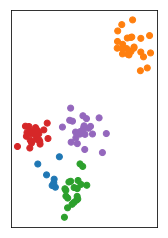

In [3]:
X, y = make_blobs(centers=4, random_state=1)

km = KMeans(n_clusters=5, random_state=0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X).shape)
scatter_tab(X[:, 0], X[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.savefig("images/kmeans_api.png")

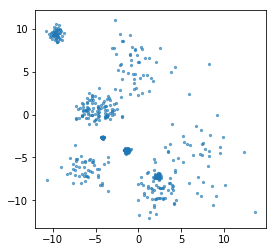

In [4]:
rng = np.random.RandomState(42)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

In [5]:
km = KMeans(n_clusters=5)
km.fit(X)
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = km.predict(np.c_[xx.ravel(), yy.ravel()])

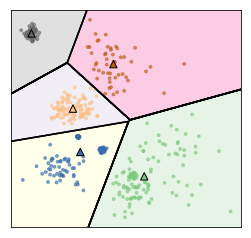

In [6]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=.2, cmap='Accent')
plt.contour(xx, yy, pred.reshape(xx.shape), colors='k')
plt.scatter(X[:, 0], X[:, 1], s=8, alpha=.6, c=km.labels_, cmap='Accent')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=55, cmap='Accent', marker="^", c=range(km.n_clusters), edgecolor='k')

plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.savefig("images/cluster_shapes_2.png")

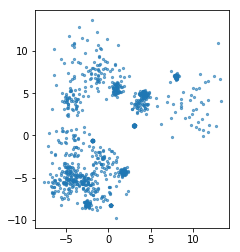

In [7]:
rng = np.random.RandomState(3)
X, y = make_blobs(n_samples=1000, centers=20, random_state=rng, cluster_std=[rng.gamma(1) for i in range(20)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

In [8]:
km = KMeans(n_clusters=15)
km.fit(X)
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = km.predict(np.c_[xx.ravel(), yy.ravel()])

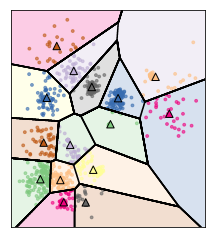

In [9]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=.2, cmap='Accent', levels=np.arange(15 + 1))
plt.contour(xx, yy, pred.reshape(xx.shape), colors='k', levels=np.arange(15 + 1))
plt.scatter(X[:, 0], X[:, 1], s=8, alpha=.6, c=km.labels_, cmap='Accent')
centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], s=55, cmap='Accent', marker="^", c=range(km.n_clusters), edgecolor='k')

plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.savefig("images/cluster_shapes_1.png")

## Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import adjusted_rand_score
import itertools
ari_min = 3
# find a random state that makes them most dissimilar ... just for illustration
for i in range(1000):
    labels = []
    for linkage in ["complete", "average", 'ward']:
        agg = AgglomerativeClustering(n_clusters=5, linkage=linkage)
        rng = np.random.RandomState(i)
        X, y = make_blobs(n_samples=100, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])
        labels.append(agg.fit_predict(X))
        
    ari = 0
    for j, k in itertools.combinations(labels, 2):
        ari += adjusted_rand_score(j, k)
    if ari_min > ari:
        ari_min = ari
        print(i, ari)

0 1.0085065985512043
7 0.999090616692345
85 0.818683326528442
325 0.7794265903808125
484 0.5518711454498323


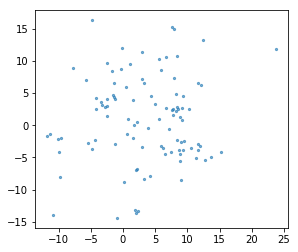

In [11]:
rng = np.random.RandomState(325)
X, y = make_blobs(n_samples=100, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

single : [96  1  1  1  1]
average : [82  9  7  1  1]
complete : [50 24 14 11  1]
ward : [31 30 20 10  9]


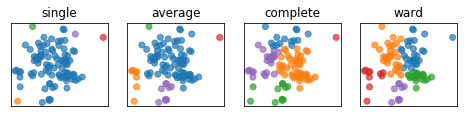

In [13]:
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 4, figsize=(8, 3), subplot_kw={"xticks":(), "yticks": ()})
for ax, linkage in zip(axes, ['single', "average", "complete", 'ward']):
    agg = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    agg.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(agg.labels_), alpha=.7)
    ax.set_title(linkage)
    ax.set_aspect("equal")
    print("{} : {}".format(linkage, np.sort(np.bincount(agg.labels_))[::-1]))
plt.savefig("images/merging_criteria.png")

## DBSCAN

min_samples: 4 eps: 2.500000  cluster: [-1 -1  0  0  0  0  0  1 -1  2  0  0  0  2  0  1  0  0  2  2  3  0  0  2
  0 -1  0 -1 -1  0  2  2  0 -1  0  4  0  2  2  0  2  2 -1  0 -1  4  3  2
  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  3  1  4 -1 -1  2  2  3
 -1  2  0  0 -1  0 -1 -1  3 -1  2 -1  0  4  0  0 -1  0  1 -1  2  0  0  2
 -1  0 -1  0]


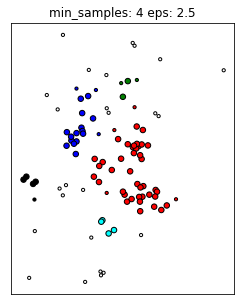

In [14]:
from sklearn.cluster import DBSCAN

min_samples = 4
eps = 2.5
plt.figure(figsize=(4, 5))
dbscan = DBSCAN(min_samples=min_samples, eps=eps)
colors = ['r', 'g', 'b', 'k', 'cyan']
markers = ['o', '^', 'v']
# get cluster assignments
clusters = dbscan.fit_predict(X)
print("min_samples: %d eps: %f  cluster: %s"
      % (min_samples, eps, clusters))
if np.any(clusters == -1):
    c = ['w'] + colors
    clusters = clusters + 1
else:
    c = colors
    m = markers
c = np.array(c)
plt.scatter(X[:, 0], X[:, 1], c=c[clusters], s=10, edgecolor="k")
inds = dbscan.core_sample_indices_
# vizualize core samples and clusters.
if len(inds):
    plt.scatter(X[inds, 0], X[inds, 1], c=c[clusters[inds]],
                     s=30, edgecolor="k")
plt.title("min_samples: %d eps: %.1f"
                     % (min_samples, eps))
plt.xticks(())
plt.yticks(())
plt.savefig("images/dbscan_algo.png")

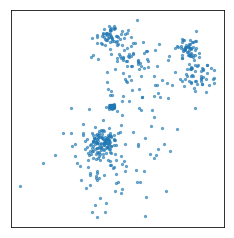

In [15]:
rng = np.random.RandomState(3)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()
plt.xticks(())
plt.yticks(())
plt.savefig("images/mm_examples_1.png")

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
print(gmm.means_)
print(gmm.covariances_)

[[-2.286 -4.674]
 [ 8.685  5.206]
 [-0.377  6.947]]
[[[ 6.651  2.066]
  [ 2.066 13.759]]

 [[ 1.481 -1.1  ]
  [-1.1    4.191]]

 [[ 5.467 -3.341]
  [-3.341  4.666]]]


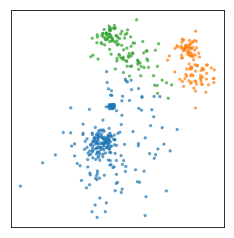

In [18]:
assignment = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
plt.savefig("images/mm_examples_2.png")

In [19]:
# log probability under the model
print(gmm.score(X))
print(gmm.score_samples(X).shape)

-5.508383131660925
(500,)


In [20]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = gmm.predict_proba(np.c_[xx.ravel(), yy.ravel()])

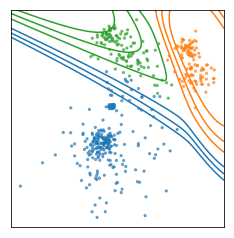

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
levels = [.9, .99, .999, 1]

for color, component in zip(range(3), pred.T):
    plt.contour(xx, yy, component.reshape(xx.shape), colors=[plt.cm.tab10(color)], levels=levels)
plt.savefig("images/prob_est1.png")

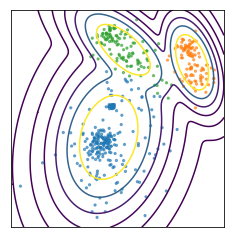

In [24]:
scores = gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
scores = np.exp(scores)
plt.contour(xx, yy, scores.reshape(xx.shape), levels=np.percentile(scores, np.linspace(0, 100, 8))[1:-1])
plt.savefig("images/prob_est2.png")

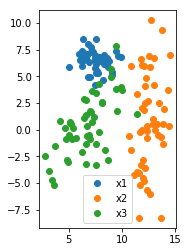

In [26]:
rnd = np.random.RandomState(4)

X1 = rnd.normal(size=(50, 2)) + rnd.normal(scale=10, size=(1, 2))
X2 = rnd.normal(scale=(1, 5), size=(50, 2)) + rnd.normal(scale=(10, 1), size=(1, 2))
X3 = np.dot(rnd.normal(scale=(1, 2), size=(50, 2)), [[1, -1], [1, 1]]) + rnd.normal(scale=(10, 1), size=(1, 2))

plt.plot(X1[:, 0], X1[:, 1], 'o', label='x1')
plt.plot(X2[:, 0], X2[:, 1], 'o', label='x2')
plt.plot(X3[:, 0], X3[:, 1], 'o', label='x3')
plt.gca().set_aspect("equal")
plt.legend()

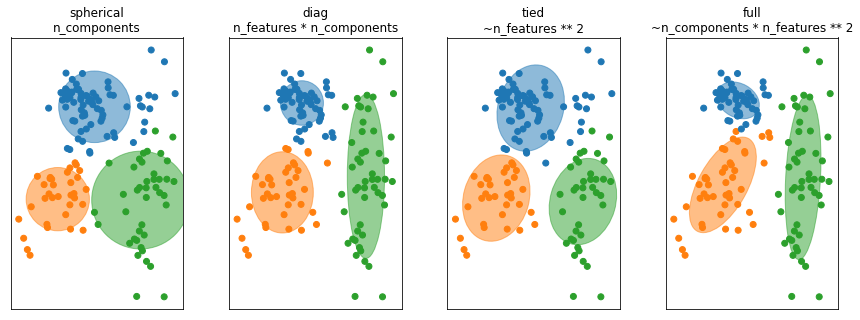

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

from sklearn.mixture import GaussianMixture

def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n], v[0], v[1],
                                  180 + angle, color=plt.cm.tab10(n))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

rnd = np.random.RandomState(4)

X1 = rnd.normal(size=(50, 2)) + rnd.normal(scale=10, size=(1, 2))
X2 = rnd.normal(scale=(1, 5), size=(50, 2)) + rnd.normal(scale=(10, 1), size=(1, 2))
X3 = np.dot(rnd.normal(scale=(1, 2), size=(50, 2)), [[1, -1], [1, 1]]) + rnd.normal(scale=(10, 1), size=(1, 2))

X = np.vstack([X1, X2, X3])

# Try GMMs using different types of covariances.
estimators = [GaussianMixture(n_components=3, covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']]

n_estimators = len(estimators)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ("spherical\nn_components", "diag\nn_features * n_components",
          "tied\n~n_features ** 2", "full\n~n_components * n_features ** 2")

for ax, title, estimator in zip(axes, titles, estimators):
    estimator.fit(X)

    make_ellipses(estimator, ax)

    pred = estimator.predict(X)    
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(pred))

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_aspect("equal")
plt.savefig("images/covariance_types.png")


## GMM vs KMeans

In [29]:
n_samples = 500
blobs = make_blobs(n_samples=n_samples, random_state=8)


# Anisotropicly distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


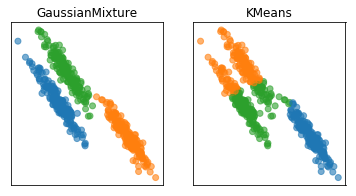

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for ax, model in zip(axes, [GaussianMixture(n_components=3), KMeans(n_clusters=3)]):
    model.fit(X_aniso)
    ax.scatter(X_aniso[:, 0], X_aniso[:, 1], c=plt.cm.tab10(model.predict(X_aniso)), alpha=.6)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(type(model).__name__)
plt.savefig("images/gmm_vs_kmeans_1.png")

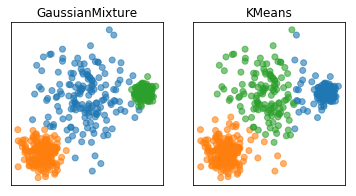

In [31]:
X_varied = varied[0]
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for ax, model in zip(axes, [GaussianMixture(n_components=3), KMeans(n_clusters=3)]):
    model.fit(X_varied)
    ax.scatter(X_varied[:, 0], X_varied[:, 1], c=plt.cm.tab10(model.predict(X_varied)), alpha=.6)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(type(model).__name__)
plt.savefig("images/gmm_vs_kmeans_2.png")

In [32]:
from scipy import stats
line = np.linspace(-8, 6, 200)
norm1 = stats.norm(0, 1)
norm2 = stats.norm(3, 2)
norm3 = stats.norm(-3.4, .5)

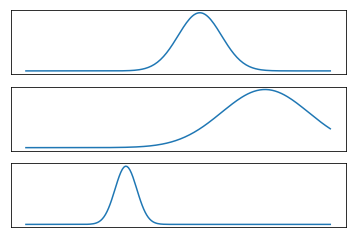

In [33]:
fig, axes = plt.subplots(3, subplot_kw={'xticks': (), 'yticks': ()})
axes[0].plot(line, norm1.pdf(line))
axes[1].plot(line, norm2.pdf(line))
axes[2].plot(line, norm3.pdf(line))
plt.savefig("images/gmm1.png")

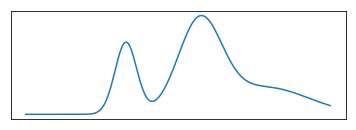

In [34]:
plt.figure(figsize=(6, 2))
plt.plot(line, .5 * norm1.pdf(line) + .3 * norm2.pdf(line) + .2 * norm3.pdf(line))
plt.xticks(())
plt.yticks(())
plt.savefig("images/gmm2.png")

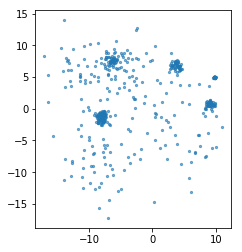

In [35]:
rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

1e-10


/home/andy/checkout/scikit-learn/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[ 647  503   44  454  518 1042  458  517    0    0  277   74    0   15
  159    0  292]
0.7096662658394226
0.0004641588833612782


/home/andy/checkout/scikit-learn/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[ 647  503   44  454  518 1042  458  517    0    0  277   74    0   15
  159    0  292]
0.7096662658394226
2154.4346900318865


/home/andy/checkout/scikit-learn/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[ 646  503   27  306  518 1041  483  517    0    0    0   62    0    0
   35    0  443  154  265]
0.6996760223489021
10000000000.0


/home/andy/checkout/scikit-learn/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[ 644  503   19  233  518 1040  494  516    0    0    0   53    0    0
   31    0  460  220  269]
0.6996790637679039


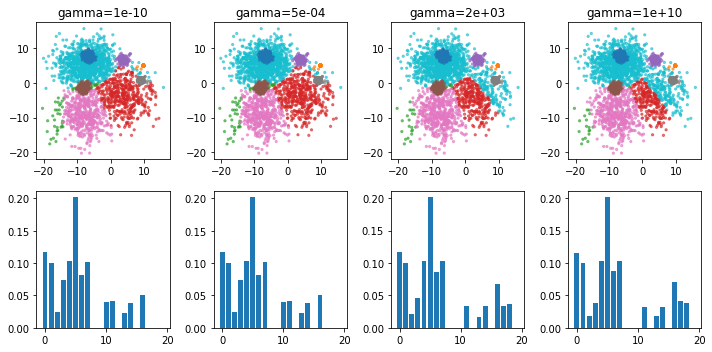

In [36]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import adjusted_rand_score

rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=5000, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
gammas = np.logspace(-10, 10, 4)
for gamma, ax in zip(gammas, axes.T):
    print(gamma)
    bgmm = BayesianGaussianMixture(n_components=20, weight_concentration_prior=gamma, random_state=1).fit(X)
    ax[0].scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(bgmm.predict(X)))
    print(np.bincount(bgmm.predict(X)))
    print(adjusted_rand_score(y, bgmm.predict(X)))
    ax[0].set_title("gamma={:.0e}".format(gamma))
    ax[1].bar(range(20), bgmm.weights_)
plt.tight_layout()